In [1]:
# -*- coding: utf-8 -*-

import numpy as np #importa a biblioteca usada para trabalhar com vetores e matrizes
import pandas as pd #importa a biblioteca usada para trabalhar com dataframes

#importa o arquivo e guarda em um dataframe do Pandas
df_set1 = pd.read_csv('set1_processado.csv', sep=',', index_col=None)
df_set2 = pd.read_csv('set2_processado.csv', sep=',', index_col=None)
df_set3 = pd.read_csv('set3_processado.csv', sep=',', index_col=None)
df_set2_3 = pd.read_csv('set_processado.csv', sep=',', index_col=None)

print('Dados carregados com sucesso!')

Dados carregados com sucesso!


In [2]:
SEED = 42

In [3]:
dataSets = [df_set1, df_set2, df_set3, df_set2_3]

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
def train_test_split(X, y, porcTrain = 0.8, random_state = 0):
    sss = StratifiedShuffleSplit(n_splits=1, train_size=porcTrain, random_state=random_state)

    train_index, test_index = next(sss.split(X,y))
    X_train = X[train_index, :]
    X_test = X[test_index, :]

    y_train = y[train_index]
    y_test = y[test_index]

    return X_train, y_train, X_test, y_test

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [6]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [7]:
from sklearn.preprocessing import StandardScaler

def normaliza(X):
    sc = StandardScaler()
    X_norm = sc.fit_transform(X)
    return X_norm

In [8]:
def logistic(dataSet, i):
    X = dataSet.drop(['Id','Class'], axis=1).values
    y = dataSet.Class.values

    X_norm = normaliza(X)
    X_train, y_train, X_test, y_test = train_test_split(X_norm, y)

    # Aplicar undersampling na classe 1
    oversampler = RandomOverSampler(sampling_strategy='minority')
    X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

    model = LogisticRegression(C = 1.0, max_iter = 500, random_state = 10)
    model.fit(X_resampled, y_resampled)

    y_pred = model.predict(X_test)
    resultados = classification_report(y_test, y_pred)

    print("Reusltados Set:", i)
    print(resultados)

    print("Curva ROC Set:", i)
    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plotar a curva ROC
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    print(f'AUC-ROC: {roc_auc:.2f}')

    return model, roc_auc


Reusltados Set: 1
              precision    recall  f1-score   support

           0       0.97      0.56      0.71       471
           1       0.11      0.76      0.20        34

    accuracy                           0.58       505
   macro avg       0.54      0.66      0.45       505
weighted avg       0.91      0.58      0.68       505

Curva ROC Set: 1


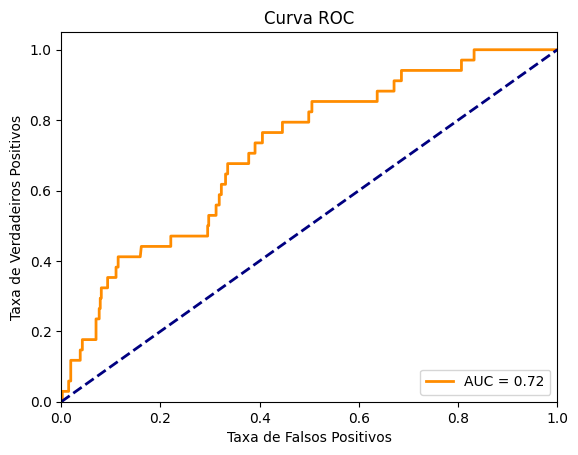

AUC-ROC: 0.72
Reusltados Set: 2
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       141
           1       0.14      0.57      0.23         7

    accuracy                           0.82       148
   macro avg       0.56      0.70      0.56       148
weighted avg       0.94      0.82      0.86       148

Curva ROC Set: 2


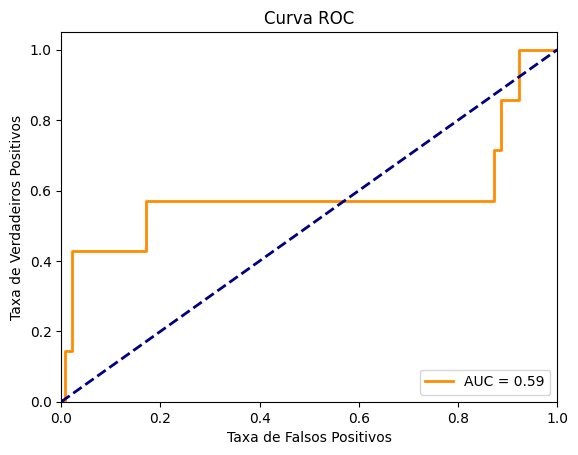

AUC-ROC: 0.59
Reusltados Set: 3
              precision    recall  f1-score   support

           0       0.96      0.74      0.83        92
           1       0.00      0.00      0.00         3

    accuracy                           0.72        95
   macro avg       0.48      0.37      0.42        95
weighted avg       0.93      0.72      0.81        95

Curva ROC Set: 3


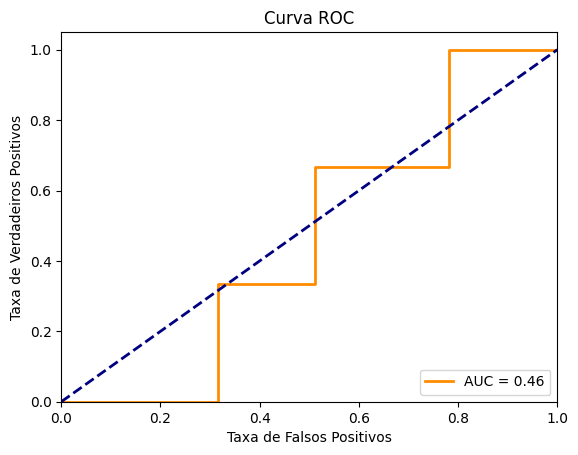

AUC-ROC: 0.46
Reusltados Set: 4
              precision    recall  f1-score   support

           0       0.98      0.13      0.24       808
           1       0.07      0.96      0.13        54

    accuracy                           0.19       862
   macro avg       0.53      0.55      0.18       862
weighted avg       0.92      0.19      0.23       862

Curva ROC Set: 4


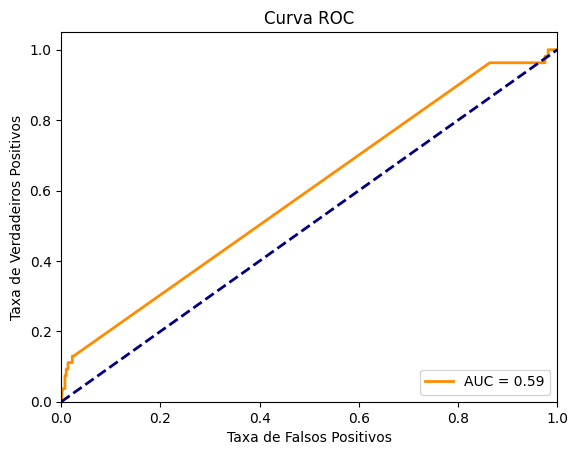

AUC-ROC: 0.59


In [9]:
i = 1
models = []
for dataSet in dataSets:
    model, roc_auc = logistic(dataSet, i)
    models.append((model, roc_auc))
    i += 1

# Escolhido -> Set 1

##Test

In [10]:
def removeNulos(df):
    df.fillna(df.mean(), inplace=True)
    return df

In [11]:
def removeRedundantes(df):
    colunas_duplicadas = df.T.duplicated()
    df_sem_duplicatas = df.loc[:, ~colunas_duplicadas]
    return df_sem_duplicatas

In [12]:
def removeValoresRepetidos(df):
    colunas_repetidas = df.columns[df.columns.duplicated()].tolist()
    df_sem_repetidos = df.drop(columns=colunas_repetidas)
    return df_sem_repetidos

In [13]:
def preProcessamento(df):
    df = removeNulos(df)
    df = removeRedundantes(df)
    df = removeValoresRepetidos(df)
    return df

In [14]:
test = pd.read_csv("test.csv")
set1 = pd.read_csv("set1.csv")
test = test.merge(set1, on='Id',  how = 'left')
df_set1_test_processado = preProcessamento(test)

In [15]:
df_set1_test_processado.shape

(401, 49)

##Rodando Modelo

In [16]:
X = df_set1.drop(['Id','Class'], axis=1).values
y = df_set1.Class.values
X_test = df_set1_test_processado.drop(['Id'], axis=1).values

# Aplicar undersampling na classe 1
oversampler = RandomOverSampler(sampling_strategy='minority')
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Aplicar undersampling na classe 0
undersampler = RandomUnderSampler(sampling_strategy='majority')
X_resampled, y_resampled = undersampler.fit_resample(X_resampled, y_resampled)

sc = StandardScaler()
X_norm = sc.fit_transform(X)

model = LogisticRegression(C = 1.0, max_iter = 500, random_state = 10)
model.fit(X_norm, y)

LogisticRegression(max_iter=500, random_state=10)

In [17]:
X_test = sc.transform(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [18]:
y_prob.shape

(401,)

In [19]:
result = {'Id':df_set1_test_processado['Id'].values, 'Predicted': y_prob}

In [20]:
df_subimit = pd.DataFrame(result)

In [21]:
df_subimit.to_csv('predictions.csv', index=False)